In [1]:
!pip3 install nltk
import nltk
nltk.download('popular')

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to
[nltk_data]    |     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to
[nltk_data]    |     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to
[nltk_data]    |     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | Downloading package gutenberg to
[nltk_data]    |     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]    |   Package gutenberg is already up-to-date!
[nltk_data]    | Downloading package inaugural to
[nltk_data]    |     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]    |   Package inaugural is already up-to-date!
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |   

True

In [2]:
!pip3 install --upgrade ir-datasets

In [3]:
import ir_datasets
dataset = ir_datasets.load("clinicaltrials/2017/trec-pm-2017")
for doc in dataset.docs_iter():
    doc
print(dataset.docs_count())

241006


In [4]:
import pandas as pd

# CreateDataFrame text data
data = dataset.docs_iter()
docs =[]
for doc in data:
  docs.append(doc.title + ' ' + doc.condition + ' ' + doc.summary +
                    ' ' + doc.detailed_description + ' ' + doc.eligibility)
df = pd.DataFrame(docs)
df.to_csv('text_data.csv', index=False)
print("CSV file created successfully.")

CSV file created successfully.


In [5]:
# Calculate the within-cluster sum of squares for different numbers of clusters
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
#elbow method for optimal clusters number
def optimize_k_means(data,min_k, max_k):
  wcss = []
  for i in range(min_k, max_k):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)

# Plot the elbow graph
  plt.plot(range(min_k, max_k), wcss)
  plt.title('Elbow Method')
  plt.xlabel('Number of clusters')
  plt.ylabel('WCSS') # within-cluster sums of squares
  plt.show()

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import nltk
from nltk.corpus import stopwords
from nltk import word_tokenize
from sklearn.decomposition import TruncatedSVD

nltk.download('stopwords')

# Load dataset
df = pd.read_csv('text_data.csv')
df.head()

stop_words = set(stopwords.words('english'))

def preprocess(text):
    return text.lower()



# Convert text data to TF-IDF
vectorizer = TfidfVectorizer(tokenizer=word_tokenize)
tfidf_matrix = vectorizer.fit_transform(docs)

#number of clusters (k)
# k = 3

# kmeans = KMeans(n_clusters=k, random_state=42)
# kmeans.fit(tfidf_matrix)
# cluster_labels = kmeans.labels_
# centroids = kmeans.cluster_centers_
# print("Centroids:")
# print(centroids)
# print("Labels:")
# print(cluster_labels)
# # Add cluster labels to the original dataframe
# df['cluster'] = cluster_labels

# # Reduce dimensions with PCA for visualization
# # pca = PCA(n_components=2)
# # reduced_features = pca.fit_transform(tfidf_matrix)
# svd = TruncatedSVD(n_components=2)
# reduced_features = svd.fit_transform(tfidf_matrix)

# plt.figure(figsize=(10, 6))
# plt.scatter(reduced_features[:, 0], reduced_features[:, 1], c=cluster_labels, cmap='viridis', marker='o')
# plt.xlabel('PCA Component 1')
# plt.ylabel('PCA Component 2')
# plt.title('K-means Clustering of Text Data')
# plt.colorbar(label='Cluster')
# plt.show()


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


c:\Users\ASUS\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


c:\Users\ASUS\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Centroids:
[[2.03519919e-04 1.08700257e-03 6.10990312e-04 ... 1.28326216e-06
  0.00000000e+00 7.58281253e-07]
 [7.40868998e-05 3.50027372e-04 1.05885108e-04 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [4.37692684e-05 6.15268599e-04 3.53684125e-05 ... 0.00000000e+00
  1.20304731e-06 0.00000000e+00]]
Labels:
[2 0 2 ... 2 2 2]


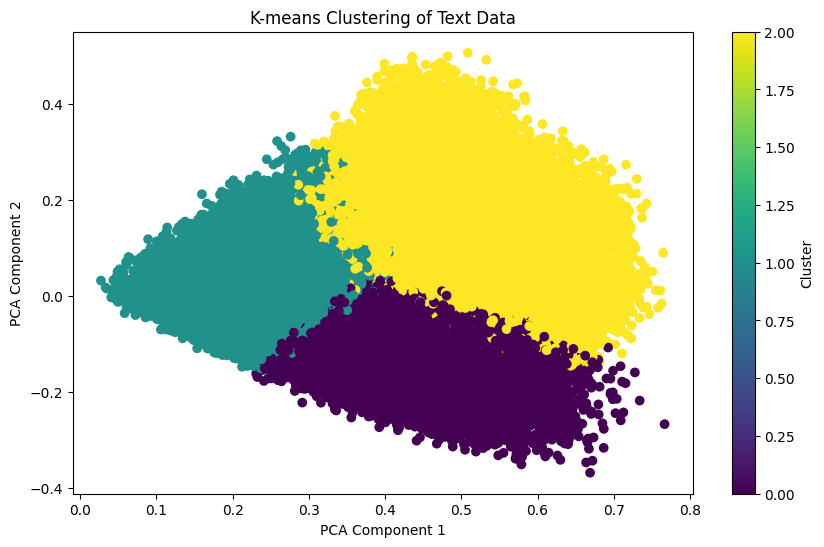

In [7]:
# number of clusters (k)
k = 3

kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(tfidf_matrix)
cluster_labels = kmeans.labels_
centroids = kmeans.cluster_centers_
print("Centroids:")
print(centroids)
print("Labels:")
print(cluster_labels)
# Add cluster labels to the original dataframe
df['cluster'] = cluster_labels

# Reduce dimensions with PCA for visualization
# pca = PCA(n_components=2)
# reduced_features = pca.fit_transform(tfidf_matrix)
svd = TruncatedSVD(n_components=2)
reduced_features = svd.fit_transform(tfidf_matrix)

plt.figure(figsize=(10, 6))
plt.scatter(reduced_features[:, 0], reduced_features[:, 1], c=cluster_labels, cmap='viridis', marker='o')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('K-means Clustering of Text Data')
plt.colorbar(label='Cluster')
plt.show()


c:\Users\ASUS\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Centroids:
[[9.03055068e-05 7.66892818e-04 2.84177209e-04 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [6.97229830e-05 3.22762626e-04 5.30322272e-05 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 1.28565531e-04 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 ...
 [8.32040128e-05 1.53906858e-03 6.72229493e-04 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [3.42123098e-05 7.64854595e-04 2.03288165e-05 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [6.92588755e-06 4.74342341e-04 7.25320873e-05 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]]
Labels:
[18  6  1 ...  2 18 18]


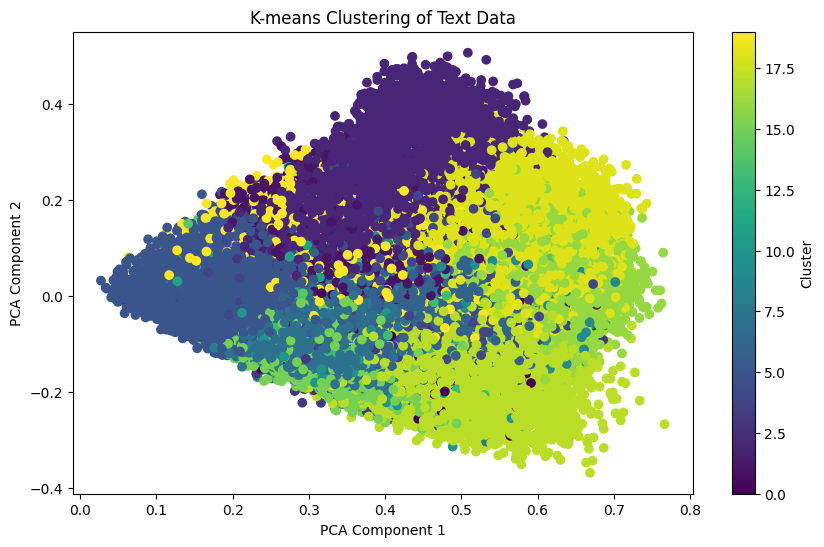

In [8]:
# number of clusters (k)
k = 20

kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(tfidf_matrix)
cluster_labels = kmeans.labels_
centroids = kmeans.cluster_centers_
print("Centroids:")
print(centroids)
print("Labels:")
print(cluster_labels)
# Add cluster labels to the original dataframe
df['cluster'] = cluster_labels

# Reduce dimensions with PCA for visualization
# pca = PCA(n_components=2)
# reduced_features = pca.fit_transform(tfidf_matrix)
svd = TruncatedSVD(n_components=2)
reduced_features = svd.fit_transform(tfidf_matrix)

plt.figure(figsize=(10, 6))
plt.scatter(reduced_features[:, 0], reduced_features[:, 1], c=cluster_labels, cmap='viridis', marker='o')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('K-means Clustering of Text Data')
plt.colorbar(label='Cluster')
plt.show()


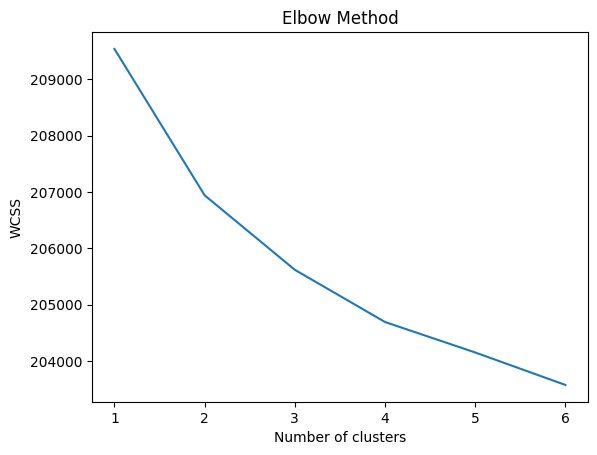

In [10]:
optimize_k_means(tfidf_matrix,1,7)

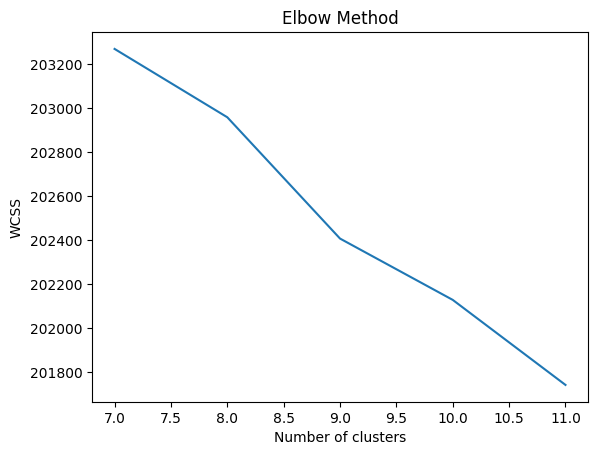

In [11]:
optimize_k_means(tfidf_matrix,7,12)

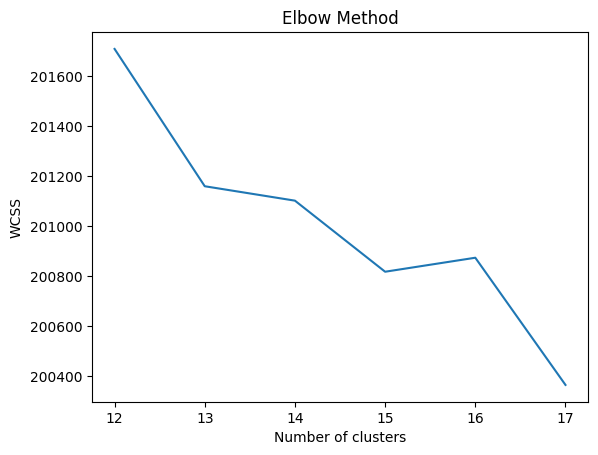

In [12]:
optimize_k_means(tfidf_matrix,12,18)

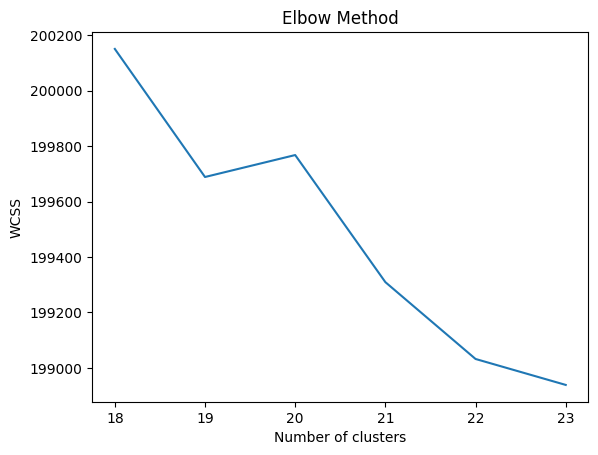

In [13]:
optimize_k_means(tfidf_matrix,18,24)

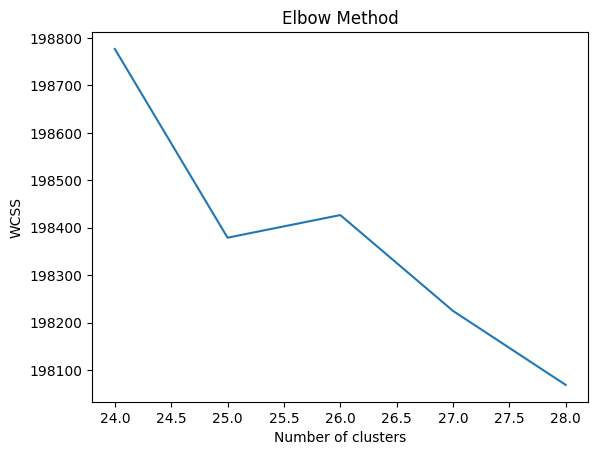

In [14]:
optimize_k_means(tfidf_matrix,24,29)

In [15]:
optimize_k_means(tfidf_matrix,29,35)

In [ ]:
optimize_k_means(tfidf_matrix,35,40)

In [ ]:
optimize_k_means(tfidf_matrix,40,45)

In [ ]:
optimize_k_means(tfidf_matrix,45,50)